# Session 3 - Time Series Extraction
This workshop covers the fundamentals of time series management with Python. The objective is to provide the student with the fundamental knowledge to process, manage and visualize time series databases in Python. Python codes are written and executed in Jupyter Notebook. Students are provided with the respective databases. Session 3 will focus on data extraction with time series.

#### Session: 3 - July 17
#### Time: 6pm- 8pm
#### Lecturer: Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

# Table of Contents
- [1. BCRP Webscrapping](#t1)
  - [1.1. Date and time in Python](#t1.1)
  - [1.2. Adding and subtracting time series](#t1.2)
  - [1.3. Creating a sequence of dates](#t1.3)
- [2. Yahoo Finance](#t2)
  - [2.1. Importing stock prices from Yahoo Finance](#t2.1)
  - [2.2. Subsetting and indexing time series](#t2.2)
- [3. Extracting from other databases](#t3)
  - [3.1. Using Econdata](#t3.1)

In [64]:
import time
start = time.time()

# <a id="t1"></a>1. BCRP Webscrapping

## <a id="t1.1"></a>1.1. Date and time in Python

Pandas was originally developed to manage finantial information, which is usually presented as time series data. The name is derived from the term "panel data", an econometrics term for data sets that include observations during multiple time periods. In this course, we are going to use to better manipulate time series data.

In [65]:
import pandas as pd # We import pandas
import numpy as np # We import other necessary libraries
import matplotlib.pyplot as plt
from datetime import datetime # This will allow us to manually create dates

### ```pd.Timestamp()```
This function allows us to create points in time, providing a precise representation of a specific date and time. It is a powerful tool for working with time series data, enabling detailed and accurate time-based indexing, comparison, and arithmetic operations.

In [66]:
timestamp = pd.Timestamp(datetime(2024,7,15))
timestamp

Timestamp('2024-07-15 00:00:00')

In [67]:
timestamp = pd.Timestamp(datetime(2024,7,15, 18, 10, 5))
timestamp

Timestamp('2024-07-15 18:10:05')

We can use timestamp attributes to access various information of the data. For example, we can retrieve the year, month and even second of the timestamp. We can also use it to access the name of the week

In [68]:
timestamp.year # year

2024

In [69]:
timestamp.quarter # quarter

3

In [70]:
timestamp.month # month

7

In [71]:
timestamp.day # day

15

In [72]:
timestamp.hour # hour

18

In [73]:
timestamp.minute # minute

10

In [74]:
timestamp.second # second

5

In [75]:
timestamp.day_name()

'Monday'

In [76]:
timestamp.dayofweek

0

In [77]:
timestamp.weekofyear

29

In [78]:
timestamp.dayofyear

197

In [79]:
print(f'We are in day {timestamp.dayofyear} of 365 days')
print(f'This is the {timestamp.weekofyear}th week of the year')

We are in day 197 of 365 days
This is the 29th week of the year


### ```pd.Period()```
Allow us to create a `Period` object, which will always have a frequency. This is useful for representing a span of time with a specific start and end, such as a month, quarter, or year. 

In [80]:
period = pd.Period('2024')
period # By default, the last name of the year

Period('2024', 'Y-DEC')

In [81]:
pd.Period('2024-07')

Period('2024-07', 'M')

In [82]:
pd.Period('2024-07-15')

Period('2024-07-15', 'D')

In [83]:
pd.Period('2024-07-15-18')

Period('2024-07-15 18:00', 'h')

In [84]:
pd.Period('2024-07-15-18-15')

Period('2024-07-15 18:00', 'h')

In [85]:
period.asfreq('D')

Period('2024-12-31', 'D')

In [86]:
period.asfreq('M')

Period('2024-12', 'M')

In [87]:
period.asfreq('Q')

Period('2024Q4', 'Q-DEC')

In [88]:
period.to_timestamp() # By default, the first day of year

Timestamp('2024-01-01 00:00:00')

In [89]:
period.to_timestamp().to_period('D') 

Period('2024-01-01', 'D')

In [90]:
period = pd.Period('2024-07-15', freq='D')

In [91]:
period.day

15

In [92]:
period.days_in_month

31

In [93]:
period.start_time

Timestamp('2024-07-15 00:00:00')

In [94]:
period.end_time

Timestamp('2024-07-15 23:59:59.999999999')

In [95]:
period

Period('2024-07-15', 'D')

### ```pd.Timedelta()```
`Timedelta` objects in pandas are used to represent differences in times, such as a duration or an interval. They are useful when doing basic arithmetic with Timestamp objects, allowing you to add or subtract durations from specific dates and times. This is particularly helpful in time series analysis, scheduling tasks, and manipulating date-time data.

In [96]:
pd.Timedelta(days=5, hours=3, minutes=30)

Timedelta('5 days 03:30:00')

In [97]:
pd.Timedelta(seconds=3600)

Timedelta('0 days 01:00:00')

In [98]:
pd.Timedelta(hours=1)

Timedelta('0 days 01:00:00')

In [99]:
pd.Timedelta(weeks=2)  

Timedelta('14 days 00:00:00')

### Some attributes for `TimeStamp` and `Period` objects

| Common Attributes               | Period Attributes            | Timestamp Attributes            |
|---------------------------------|------------------------------|---------------------------------|
| `.year`                         | `.freq`                      | `.date`                         |
| `.month`                        | `.freqstr`                   | `.time`                         |
| `.day`                          | `.days_in_month`             | `.strftime()`                   |  
| `.hour`                         | `.is_leap_year`              | `.timestamp()`                  |        
| `.minute`                       | `.ordinal`                   | `.to_julian_date()`             |            
| `.second`                       | `.qyear`                     | `.to_period()`                  |    
| `.dayofweek`                    | `.start_time`                | `.weekday()`                    |
| `.dayofyear`                    | `.end_time`                  | `.astimezone()`                 |
| `.weekofyear`                   | `.strftime()`                |                                 | 
| `.quarter`                      | `.to_timestamp()`            |                                 |




## <a id="t1.2"></a>1.2. Adding and subtracting time series
We can do some basic date arithmetic with our time series objetcs

In [100]:
today = pd.Period('2024-07-15')
today

Period('2024-07-15', 'D')

In [101]:
today + 3

Period('2024-07-18', 'D')

In [102]:
today - 3

Period('2024-07-12', 'D')

In [103]:
pd.Timestamp('2024-07-15') + pd.Timedelta(days=3)

Timestamp('2024-07-18 00:00:00')

In [104]:
pd.Timestamp('2024-07-15') - pd.Timedelta(days=3)

Timestamp('2024-07-12 00:00:00')

In [105]:
period + 2

Period('2024-07-17', 'D')

In [106]:
period - 2

Period('2024-07-13', 'D')

In [107]:
july = pd.Period('2024-07')

In [108]:
july+5

Period('2024-12', 'M')

In [109]:
july-5

Period('2024-02', 'M')

## <a id="t1.3"></a>1.3. Creating a sequence of dates

In order to create a time series, we will need a sequence of dates. In this subsection we will learn how to do that. 

### ```pd.date_range()```
This pandas function allows us to create a `DatetimeIndex`, which can be used to generate a range of dates with a specified frequency. This DatetimeIndex can serve multiple purposes, such as being used as an index for a DataFrame or Series, facilitating time series analysis, and aligning data to specific date ranges. 

In [110]:
pd.date_range(start='2003', periods=21, freq='Y')

C:\Users\estca\AppData\Local\Temp\ipykernel_22332\1747562845.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start='2003', periods=21, freq='Y')


DatetimeIndex(['2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31',
               '2023-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [111]:
pd.date_range(start='2013', periods=21, freq='M')

C:\Users\estca\AppData\Local\Temp\ipykernel_22332\3828105659.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2013', periods=21, freq='M')


DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30'],
              dtype='datetime64[ns]', freq='ME')

In [112]:
index = pd.date_range(start='2024-01-01', periods=12, freq='M')
index[0]

C:\Users\estca\AppData\Local\Temp\ipykernel_22332\1001732193.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start='2024-01-01', periods=12, freq='M')


Timestamp('2024-01-31 00:00:00')

In [113]:
index.to_period()

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')

In [114]:
index.to_period().to_timestamp()

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [115]:
# Creating a dataframe
datetime_index = pd.date_range(start='2024-01', periods=12, freq='M')
df_datetime = pd.DataFrame({'data': np.random.random(size=12)}, index=datetime_index)
df_datetime

C:\Users\estca\AppData\Local\Temp\ipykernel_22332\2782821598.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datetime_index = pd.date_range(start='2024-01', periods=12, freq='M')


,data
2024-01-31,0.350502
2024-02-29,0.287847
2024-03-31,0.439266
2024-04-30,0.769535
2024-05-31,0.513260
2024-06-30,0.955828
2024-07-31,0.009266
2024-08-31,0.465296
2024-09-30,0.517304
2024-10-31,0.404457


In [116]:
# We create the range of dates here from January 1st 2024 to January 7th 2024
days = pd.date_range(start='2024-7-15', periods =7, freq='D')

# We iterate over the dates and print the name of the weekday
for day in days:
    print(day.dayofweek, day.day_name())

0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday
6 Sunday


### `pd.period_range()`
This pandas function allows us to create a `PeriodIndex`, which can be used to generate a range of time periods with a specified frequency. 

In [117]:
pd.period_range(start='2003', periods=21, freq='Y')

PeriodIndex(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
             '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
             '2019', '2020', '2021', '2022', '2023'],
            dtype='period[Y-DEC]')

In [118]:
pd.period_range(start='2024-01-01', periods=12, freq='M')

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')

In [119]:
index = pd.period_range(start='2024-01-01', periods=12, freq='M')
index[0]

Period('2024-01', 'M')

In [120]:
index.to_timestamp()

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [121]:
index.to_timestamp().to_period()

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')

In [122]:
# Creating a dataframe
period_index = pd.period_range(start='2024-01', periods=12, freq='M')
df_period = pd.DataFrame({'data': range(12)+np.random.random(size=12)}, index=period_index)
df_period

,data
2024-01,0.579062
2024-02,1.416658
2024-03,2.637883
2024-04,3.790159
2024-05,4.992018
2024-06,5.947583
2024-07,6.811142
2024-08,7.616570
2024-09,8.283608
2024-10,9.344456


### Differences between `PeriodIndex` and `DatetimeIndex`

| Feature             | `DatetimeIndex`                                         | `PeriodIndex`                                           |
|---------------------|---------------------------------------------------------|---------------------------------------------------------|
| **Definition**      | Sequence used to index time series by specific points in time | Sequence used to index time series by spans of time (periods) |
| **Granularity**     | Represents precise moments in time                      | Represents periods of time with a defined frequency      |
| **Flexibility**     | Allows operations involving specific timestamps         | Allows operations involving whole periods               |
| **Use**        | Ideal for data where exact timestamps are important (e.g., financial data, time series data) | Ideal for data aggregated over consistent intervals (e.g., monthly sales, quarterly reports) |
| **Creation Example**| `pd.date_range(start='2024-01-01', periods=31, freq='D')` | `pd.period_range(start='2024-01', periods=12, freq='M')`  |
| **Attributes**      | Access to year, month, day, hour, minute, second        | Access to start time, end time, and frequency            |
| **Timezone**        | Can be localized and converted to different timezones   | Does not involve timezones                               |
| **Use of Frequency**| Optional; can represent irregular time points           | Always associated with a specific frequency              |
| **Arithmetic Ops**  | Operations involve exact timestamps and `Timedelta` objects | Operations involve whole periods and period arithmetic   |
| **Typical Use Cases**| High-frequency data or data requiring precise timestamps | Regular interval data where periods matter more than exact timestamps |

During the development of this course we are going to mainly use `DatetimeIndex`

# <a id="t2"></a>2. Yahoo Finance

In [123]:
# !pip install yfinance
import yfinance as yf

## <a id="t2.1"></a>2.1. Importing stock prices from Yahoo Finance

### `.Ticker()`

In [124]:
apple = yf.Ticker("AAPL")
nvidia = yf.Ticker("NVDA")
google = yf.Ticker("GOOG")

In [125]:
apple.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [126]:
apple_info = apple.info

In [127]:
apple_info['country']

'United States'

In [128]:
apple_info['sector']

'Technology'

In [129]:
apple_info['debtToEquity']

140.968

In [130]:
apple_info['bookValue'] 

4.837

In [131]:
apple_info['ebitda']

129629003776

### `.history()`

In [132]:
apple.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-06-10 00:00:00-04:00,196.899994,197.300003,192.149994,193.119995,97262100,0.0,0.0
2024-06-11 00:00:00-04:00,193.649994,207.160004,193.630005,207.149994,172373300,0.0,0.0
2024-06-12 00:00:00-04:00,207.369995,220.199997,206.899994,213.070007,198134300,0.0,0.0
2024-06-13 00:00:00-04:00,214.740005,216.750000,211.600006,214.240005,97862700,0.0,0.0
2024-06-14 00:00:00-04:00,213.850006,215.169998,211.300003,212.490005,70122700,0.0,0.0
2024-06-17 00:00:00-04:00,213.369995,218.949997,212.720001,216.669998,93728300,0.0,0.0
2024-06-18 00:00:00-04:00,217.589996,218.630005,213.000000,214.289993,79943300,0.0,0.0
2024-06-20 00:00:00-04:00,213.929993,214.240005,208.850006,209.679993,86172500,0.0,0.0
2024-06-21 00:00:00-04:00,210.389999,211.889999,207.110001,207.490005,246421400,0.0,0.0


In [133]:
apple.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086998,0.086998,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-01 00:00:00-04:00,212.089996,217.509995,211.919998,216.750000,60402900,0.0,0.0
2024-07-02 00:00:00-04:00,216.149994,220.380005,215.100006,220.270004,58046200,0.0,0.0
2024-07-03 00:00:00-04:00,220.000000,221.550003,219.029999,221.550003,37369800,0.0,0.0


<Axes: xlabel='Date'>

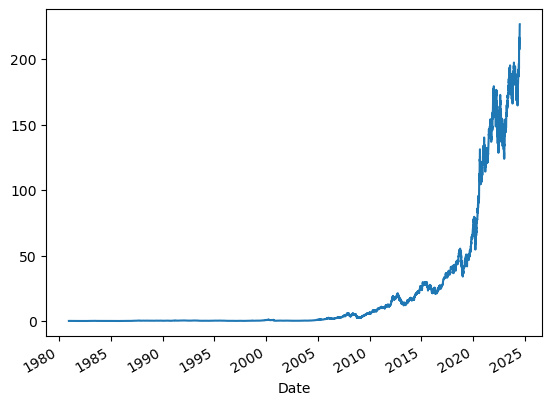

In [134]:
apple.history(period="max")["Close"].plot()

# <a id="t3"></a>3. Extracting from other databases

## <a id="t3.1"></a>3.1 Using Econdata
Econdata is a library for the extraction of time series of the main economic institutions for Peru. The current version includes the following institutions:

1. Central Reserve Bank of Peru (BCRP) 
2. World Bank (WB)
3. Federal Reserve Economic Data (FRED)
4. International Monetary Fund (IMF)
5. Organization for Economic Co-operation and Development (OECD)
6. Yahoo! Finance (YFinance)

More information: <a href="https://github.com/mauricioalvaradoo/econdata?tab=readme-ov-file#instalaci%C3%B3n" target="_blank">    here </a>

In [137]:
# pip install econdata

In [141]:
from econdata import BCRP
from econdata import WB
from econdata import FRED
from econdata import OECD
from econdata import YFinance
from econdata import IMF

### `search()`

In [142]:
BCRP.search(
    consulta=['PBI'],
    grupo=['Producto', 'variaciones'],
    frecuencia='Trimestral'
)

,Grupo de serie,Nombre de serie,Frecuencia,Fecha de inicio,Fecha de fin
Código de serie,,,,,
PN02507AQ,Producto bruto interno (variaciones porcentuales),PBI Global,Trimestral,T1-1980,T4-2023
PN02526AQ,Producto bruto interno por tipo de gasto (vari...,PBI,Trimestral,T1-1980,T4-2023


In [143]:

WB.search(
    consulta=['gdp', 'per', 'capita']
)

,title
id,
NY.GDP.PCAP.CD,GDP per capita (current US$)
NY.GDP.PCAP.CN,GDP per capita (current LCU)
NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$)
NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %)
NY.GDP.PCAP.KN,GDP per capita (constant LCU)
NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)"
NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation..."
PA.NUS.PPP,PPP can be used to convert national accounts d...
SE.XPD.PRIM.PC.ZS,"Government expenditure per student, primary (%..."


In [156]:
WB.search(
    ['life', 'expectancy']
)

,title
id,
SH.DYN.0509,Mortality rates for different age groups (infa...
SH.DYN.MORT,Mortality rates for different age groups (infa...
SP.DYN.CDRT.IN,The crude death rate is a good indicator of th...


In [144]:
YFinance.search(
    consulta=['Microsoft']
)

,Name,Country,IPO Year,Sector,Industry
Symbol,,,,,
MSFT,Microsoft Corporation Common Stock,United States,1986,Technology,Computer Software: Prepackaged Software


In [145]:
IMF.search('Indicadores', ['GDP'])

,Nombres,Unidades,Dataset
Código,,,
NGDP_RPCH,Real GDP growth,Annual percent change,WEO
NGDPD,"GDP, current prices",Billions of U.S. dollars,WEO
NGDPDPC,"GDP per capita, current prices\n",U.S. dollars per capita,WEO
PPPGDP,"GDP, current prices",Purchasing power parity; billions of internati...,WEO
PPPPC,"GDP per capita, current prices",Purchasing power parity; international dollars...,WEO
PPPSH,"GDP based on PPP, share of world",Percent of World,WEO
BCA_NGDPD,"Current account balance, percent of GDP",Percent of GDP,WEO
rev,"Government revenue, percent of GDP",% of GDP,FPP
exp,"Government expenditure, percent of GDP",% of GDP,FPP


In [151]:
IMF.search('Países', ['Chile'])

,Nombres
Código,
CHL,Chile


In [153]:
IMF.search('Países', ['Peru'])

,Nombres
Código,
PER,Peru


### `.get_data()`

In [157]:
df = BCRP.get_data(
    {
        'PN01207PM': 'TC Interbancario promedio - pdp',
        'PN01205PM': 'TC Interbancario compra - pdp',
        'PN01206PM': 'TC Interbancario venta - pdp'
    },
    fechaini = '2000-01',
    fechafin = '2022-01'
)
df.head()

,TC Interbancario promedio - pdp,TC Interbancario compra - pdp,TC Interbancario venta - pdp
2000-01-01,3.499776,3.498686,3.500867
2000-02-01,3.455024,3.453443,3.456605
2000-03-01,3.442857,3.441504,3.444209
2000-04-01,3.478736,3.477294,3.480178
2000-05-01,3.504061,3.503100,3.505023


In [159]:
df = WB.get_data(
    countries = {
        'BR': 'Brasil',
        'CL': 'Chile',
        'PE': 'Perú'
    },
    indicators = {
        'SP.DYN.LE60.MA.IN': 'Life expectancy at age 60, male'
    },
    fechaini = '1977',
    fechafin = '2022'
)
df = df.dropna()
df.head(10)

,Brasil,Chile,Perú
,"Life expectancy at age 60, male","Life expectancy at age 60, male","Life expectancy at age 60, male"
time,,,
1977,16.5432,15.1183,15.2375
1978,16.6148,15.2490,15.2596
1979,16.7079,14.9984,15.2383
1980,16.7750,15.2033,15.1506
1981,16.8489,15.7035,15.0092
1982,16.9110,15.6116,14.8410
1983,16.9678,15.2794,14.6944
1984,17.0113,15.3338,14.6344


In [167]:
df = IMF.get_data(
    'NGDP_RPCH',
    {
         'PER': 'Perú',
         'CHL': 'Chile'
    }
)
df.head()

,CHL,PER
1980,7.9,7.7
1981,6.2,5.5
1982,-13.6,-0.3
1983,-2.8,-9.3
1984,5.9,3.8


In [164]:
YFinance.get_data(
    {
        'AAPL': 'Apple',
        'MSFT': 'Microsoft',
        'TSLA': 'Tesla'
    },
    fechaini = '2015-01-01',
    fechafin = '2022-12-31'
)

,Apple,Microsoft,Tesla
Date,,,
2015-01-02,24.402176,40.305367,14.620667
2015-01-05,23.714725,39.934734,14.006000
2015-01-06,23.716949,39.348595,14.085333
2015-01-07,24.049522,39.848537,14.063333
2015-01-08,24.973562,41.020802,14.041333
...,...,...,...
2022-12-23,130.782562,235.769760,123.150002
2022-12-27,128.967529,234.021713,109.099998
2022-12-28,125.010132,231.621841,112.709999


In [165]:
YFinance.get_data(
    {
        'AAPL': 'Apple',
        'MSFT': 'Microsoft',
        'TSLA': 'Tesla'
    }
)

,Apple,Microsoft,Tesla
Date,,,
1980-12-12,0.099058,NaN,NaN
1980-12-15,0.093890,NaN,NaN
1980-12-16,0.086999,NaN,NaN
1980-12-17,0.089152,NaN,NaN
1980-12-18,0.091737,NaN,NaN
...,...,...,...
2024-07-01,216.750000,456.730011,209.860001
2024-07-02,220.270004,459.279999,231.259995
2024-07-03,221.550003,460.769989,246.389999
